<a href="https://colab.research.google.com/github/lDaysukel/dap-2024/blob/main/les05/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №5. Визуализация данных

Выполнил студент группы 12002209 Телятников Максим Евгеньевич

In [8]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Matplotlib version: {mpl.__version__}")

%matplotlib inline

Python version: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
Numpy version: 2.0.2
Matplotlib version: 3.10.0


Задача **1**

Постройте два линейных графика функции $y=\frac{2}{x}+3$ на одной оси координат, первый для диапазона x=[-10;0], а второй для x=[0;7].

* Графики должны быть помещены на оси с пределами xlim(-10, 10) и ylim(-10, 10), иметь подписи к осям, легенду и заголовок.
* Первый график должен быть красного цвета и нарисован штрихпунктирной линией
* Второй график должен иметь цвет (1.0,0.2,0.3) и нарисован сплошной линией


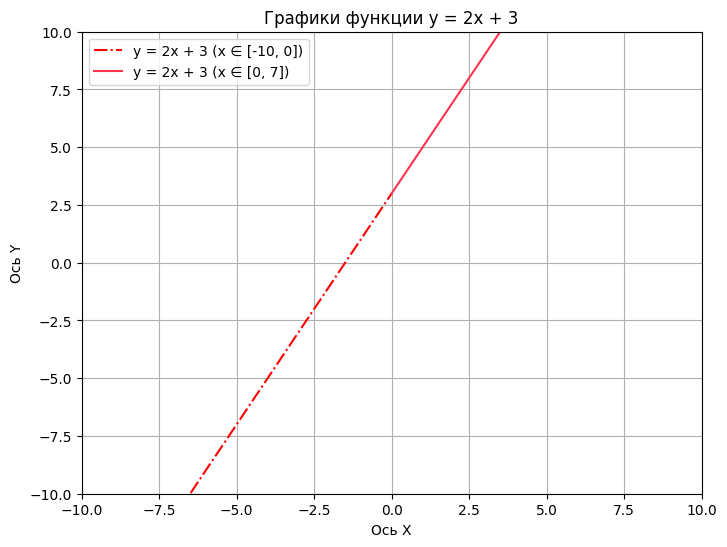

In [9]:
x1 = np.linspace(-10, 0, 100)
y1 = 2 * x1 + 3

x2 = np.linspace(0, 7, 100)
y2 = 2 * x2 + 3

plt.figure(figsize=(8, 6))

plt.plot(x1, y1, color='red', linestyle='-.', label='y = 2x + 3 (x ∈ [-10, 0])')

plt.plot(x2, y2, color=(1.0, 0.2, 0.3), linestyle='-', label='y = 2x + 3 (x ∈ [0, 7])')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.title('Графики функции y = 2x + 3')

plt.legend()

plt.grid(True)
plt.show()

Задача **2**

Постройте диаграмму рассеяния для набора данных titanic (файл ./data/titanic.csv).

* По оси X - возврат пассажира (Age)
* По оси Y - стоимость билета (Fare)
* Для выживших пассажиров используется маркер зеленый круг (Survived)
* Для не выживших пассажиров используется маркер красный крест (Survived)
* График должен подписи к осям и легенду и заголовок

Данные для которых не указан возврат или стоимость билета должны быть исключены

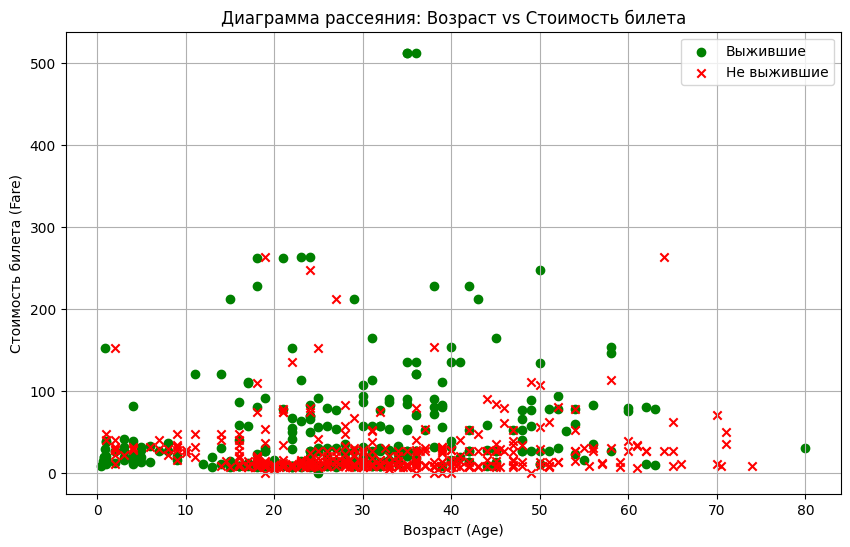

In [11]:
df = pd.read_csv('titanic.csv')

df_cleaned = df.dropna(subset=['Age', 'Fare'])

survived = df_cleaned[df_cleaned['Survived'] == 1]
not_survived = df_cleaned[df_cleaned['Survived'] == 0]

plt.figure(figsize=(10, 6))

plt.scatter(survived['Age'], survived['Fare'], color='green', marker='o', label='Выжившие')

plt.scatter(not_survived['Age'], not_survived['Fare'], color='red', marker='x', label='Не выжившие')

plt.xlabel('Возраст (Age)')
plt.ylabel('Стоимость билета (Fare)')
plt.title('Диаграмма рассеяния: Возраст vs Стоимость билета')
plt.legend()

plt.grid(True)
plt.show()

Задача **3**

Для первоначального анализа данных часто используются диаграммы рассеяния для всех признаков из набора данных. Это позволяет визуально увидеть зависимости между признаками и выбросы.
Для набора данных [iris](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) постройте на одном холсте 16 диаграмм рассеяния показывающих зависимости между всеми признаками набора ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)')

* Холст должен содержать 16 графиков на отдельных осях (см. иллюстрацию к статье в Википедия)
* Цвет маркеров должен зависеть от вида ирисов (iris.target)
* Графики должны иметь подписи к осям, легенду и общий заголовок

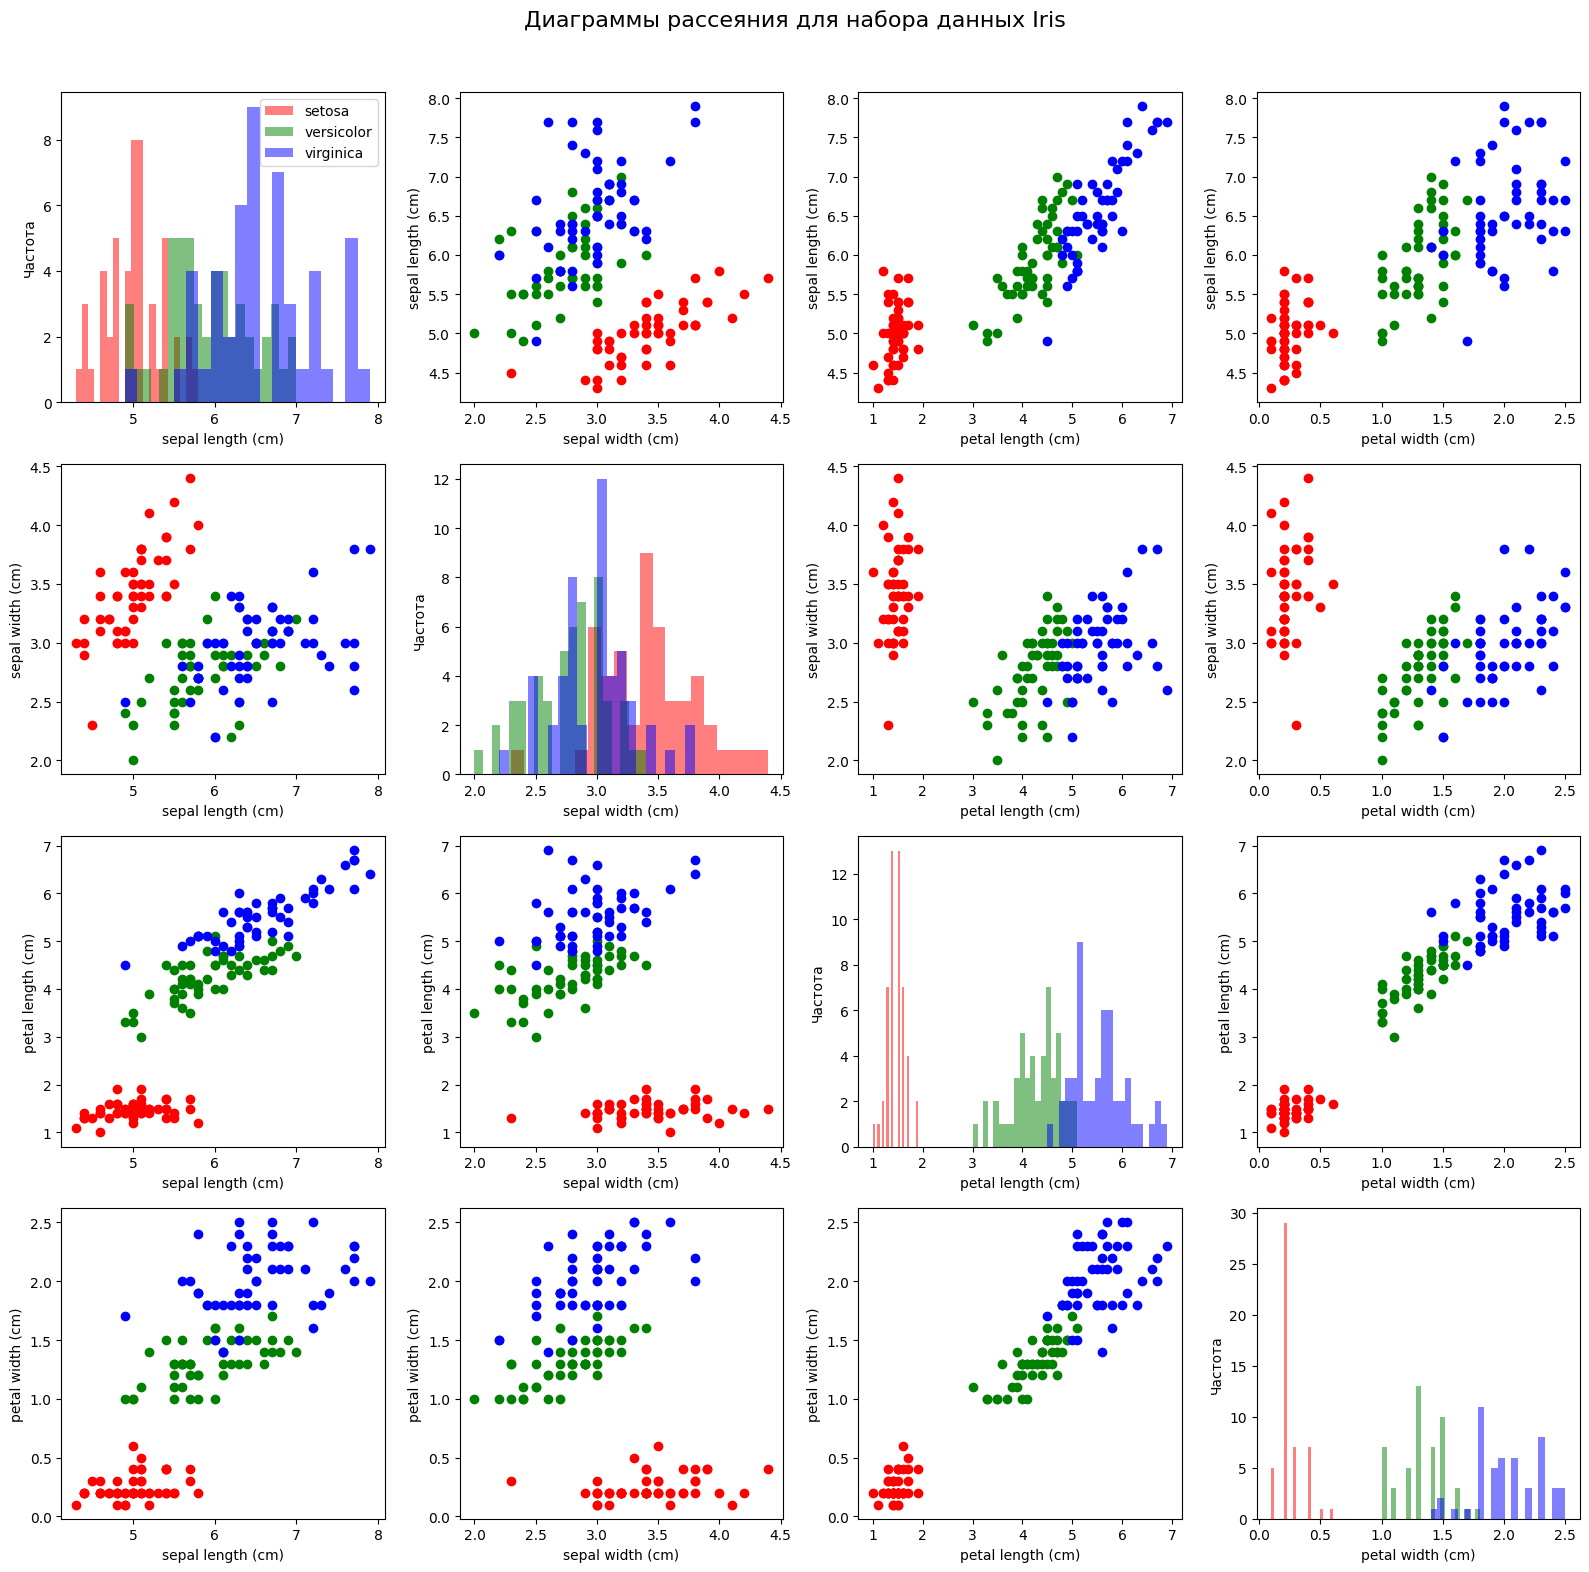

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle('Диаграммы рассеяния для набора данных Iris', fontsize=16)

colors = ['red', 'green', 'blue']

for i in range(4):
    for j in range(4):
        ax = axes[i, j]

        if i == j:
            for target_id in range(3):
                ax.hist(X[y == target_id, i], bins=20, color=colors[target_id], alpha=0.5, label=target_names[target_id])
            ax.set_xlabel(feature_names[i])
            ax.set_ylabel('Частота')
        else:
            for target_id in range(3):
                ax.scatter(X[y == target_id, j], X[y == target_id, i], color=colors[target_id], label=target_names[target_id])
            ax.set_xlabel(feature_names[j])
            ax.set_ylabel(feature_names[i])

        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Задача **4**

Постройте на одном холсте и разный осях следующие распределения для набора данных titanic (./data/titanic.csv):

* Постройте гистограмму распределения пассажиров по возрасту (Age). Интервал 5 лет.
* Постройте гистограмму распределения пассажиров женского пола по стоимости билетов (Fare). Подберите удобный интервал
* График должен иметь подписи к осям, легенду и заголовок

Данные для которых не указан возраст или стоимость билета должны быть исключены

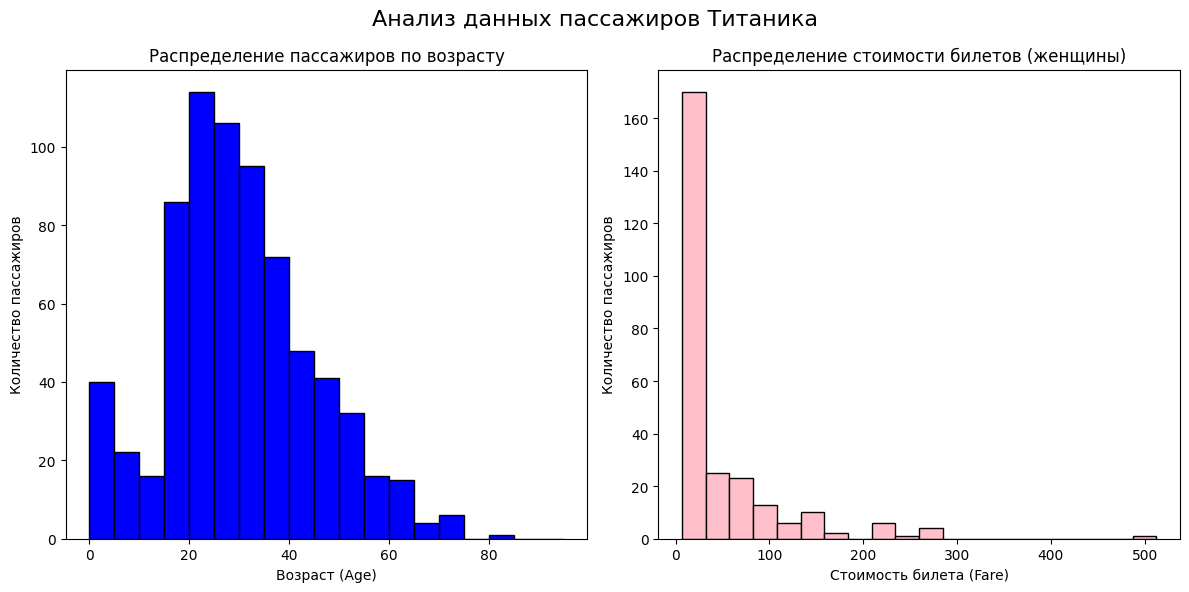

In [13]:
df = pd.read_csv('titanic.csv')
df_cleaned = df.dropna(subset=['Age', 'Fare'])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].hist(df_cleaned['Age'], bins=range(0, 100, 5), color='blue', edgecolor='black')
axes[0].set_xlabel('Возраст (Age)')
axes[0].set_ylabel('Количество пассажиров')
axes[0].set_title('Распределение пассажиров по возрасту')

female_df = df_cleaned[df_cleaned['Sex'] == 'female']
axes[1].hist(female_df['Fare'], bins=20, color='pink', edgecolor='black')
axes[1].set_xlabel('Стоимость билета (Fare)')
axes[1].set_ylabel('Количество пассажиров')
axes[1].set_title('Распределение стоимости билетов (женщины)')

fig.suptitle('Анализ данных пассажиров Титаника', fontsize=16)

plt.tight_layout()
plt.show()

Задача **5**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - средняя стоимость за проезд для данного класса (Fare)
* График должен иметь подписи к осям, легенду и заголовок

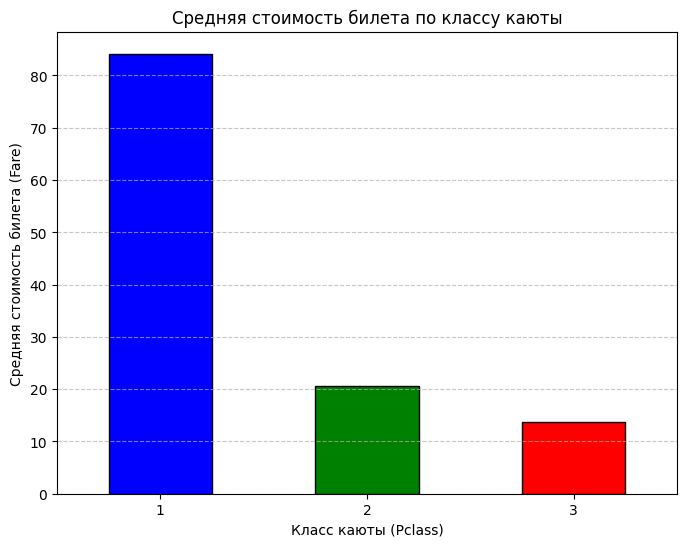

In [14]:
df = pd.read_csv('titanic.csv')
average_fare_by_class = df.groupby('Pclass')['Fare'].mean()

plt.figure(figsize=(8, 6))
average_fare_by_class.plot(kind='bar', color=['blue', 'green', 'red'], edgecolor='black')

plt.xlabel('Класс каюты (Pclass)')
plt.ylabel('Средняя стоимость билета (Fare)')
plt.title('Средняя стоимость билета по классу каюты')
plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Задача **6**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму c накоплением:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - количество пассажиров с разбивкой по полу (Sex)
* График должен иметь подписи к осям, легенду и заголовок

<Figure size 800x600 with 0 Axes>

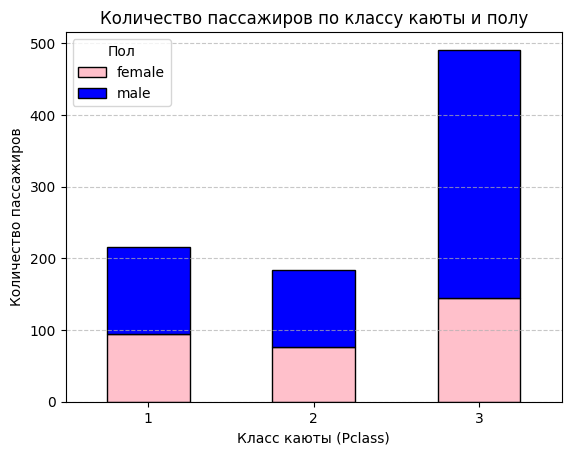

In [16]:
df = pd.read_csv('titanic.csv')
grouped_data = df.groupby(['Pclass', 'Sex']).size().unstack()

plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', stacked=True, color=['pink', 'blue'], edgecolor='black')

plt.xlabel('Класс каюты (Pclass)')
plt.ylabel('Количество пассажиров')
plt.title('Количество пассажиров по классу каюты и полу')
plt.xticks(rotation=0)
plt.legend(title='Пол')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Задача **7**

Для набора данных iris постройте круговую диаграмму

* Диаграмма должна иметь 3 сектора отражающих долю ирисов данного вида в наборе
* Сектор с максимальной долей долен быть выдвинут
* График должен иметь подписи к осям, легенду и заголовок

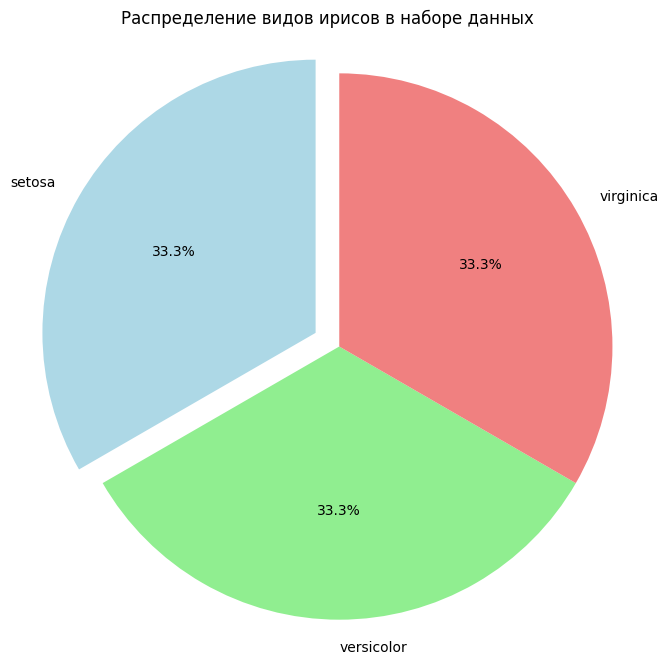

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()

target = iris.target
target_names = iris.target_names

counts = np.bincount(target)

plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0)
plt.pie(counts, labels=target_names, autopct='%1.1f%%', startangle=90, explode=explode, colors=['lightblue', 'lightgreen', 'lightcoral'])

plt.title('Распределение видов ирисов в наборе данных')
plt.axis('equal')
plt.show()

Задача **8**

Использую библиотеку [Seaborn](https://seaborn.pydata.org/) постройте гистограмму для возраста пассажиров "Титаника"

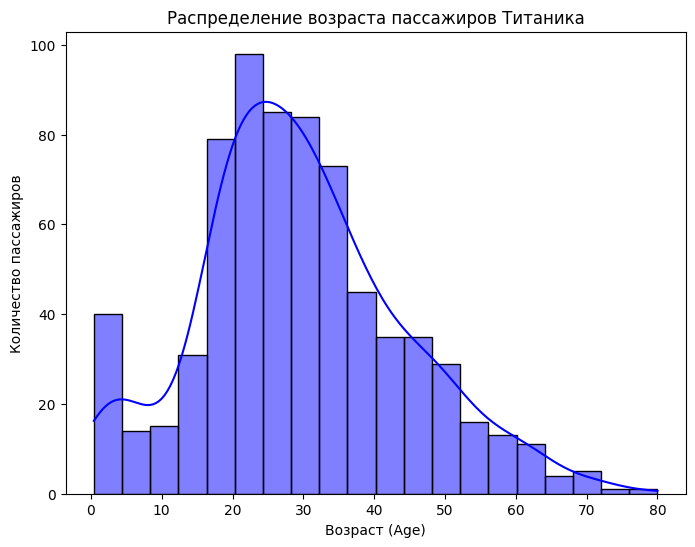

In [18]:
import seaborn as sns

df = pd.read_csv('titanic.csv')
df_cleaned = df.dropna(subset=['Age'])

plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Age'], bins=20, kde=True, color='blue')

plt.xlabel('Возраст (Age)')
plt.ylabel('Количество пассажиров')
plt.title('Распределение возраста пассажиров Титаника')

plt.show()

## Вопросы


1. Для чего используется диаграмма рассеяния?

Диаграмма рассеяния используется для визуализации зависимости между двумя числовыми переменными. Она помогает выявить:

- Наличие корреляции между переменными.

- Выбросы в данных.

- Закономерности или кластеры.

2. Что такое гистограмма, чем он отличается от столбчатой диаграммы?

Гистограмма:

- Используется для отображения распределения одной числовой переменной.

- Ось X представляет интервалы (бины), а ось Y — частоту значений в каждом интервале.

Столбчатая диаграмма:

- Используется для сравнения категориальных данных.

- Ось X представляет категории, а ось Y — значения.

3. Как задать цвет линии в линейном графике Matplotlib?

Цвет линии можно задать с помощью параметра color в функции plot()

~~~
plt.plot(x, y, color='red')
~~~

4. Чем класс plt.Figure отличается от объекта  plt.Axes?

plt.Figure:

- Представляет весь график (холст), на котором могут располагаться несколько осей (Axes).

plt.Axes:

- Представляет одну систему координат (одну область для построения графика) на холсте.

5. Matplotlib не позволяет управлять типом маркера scatter графика. Да или нет?

Нет. Matplotlib позволяет управлять типом маркера с помощью параметра marker

6. Matplotlib единственная библиотека для построения графиков в Python. Да или нет?

Нет. Кроме Matplotlib, существуют и другие библиотеки, например:

- Seaborn

- Plotly

- Bokeh

- Altair

7. Matplotlib не позволяет сохранить график в виде файла, нужно делать скриншот?

Нет. Matplotlib позволяет сохранить график в файл с помощью метода savefig()

8. В наборе данных iris представлены 4 вида ирисов. Да или нет?

Нет. В наборе данных iris представлены 3 вида ирисов
~~~
from sklearn.datasets import load_iris

iris = load_iris()
print("Виды ирисов:", iris.target_names)
~~~

9. Для всех пассажиров "Титаника" указан возраст. Да или нет?

Нет. В наборе данных titanic.csv есть пропущенные значения в столбце Age

~~~
df = pd.read_csv('titanic.csv')
print("Количество пропущенных значений в столбце Age:", df['Age'].isnull().sum())
~~~

10. Как на одном холсте может располагаться не более 16 диаграмм, это обусловлено тем что размер диаграммы нельзя изменить и более мелкие графики попросту не будут видны.

Нет. На одном холсте можно расположить любое количество диаграмм, используя plt.subplots(). Размер диаграмм можно изменять с помощью параметра figsize